# Project: TNDb movie data

## Table of Contents
<ul>
    <li>Introduction</li>
    <li><a href="#wrangling">Data Wrangling</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusions">Conclusions</a></li>
</ul>
    
   
## Introduction

I found the movie data set very interesting and therefore decided to look into the TMDb movie data. It contains information on release dates, runtimes, budget and revenues as well as on directors and actors, popularity and other topics.

Based on the data included in the data set, I will answer the following questions:

<ul>
<li><a href="#Q1">Which genres are most frequent from year to year?</a></li>
<li><a href="#Q2">What kinds of properties are associated with movies that have high revenues?</a></li>
<li><a href="#Q3">Which directors were most popular per year?</a></li>
<li><a href="#Q4">Movies coming out in which season generated most revenues?</a></li>
<li><a href="#Q5">Movies with which actors generate most revenues?</a></li>
<li><a href="#Q6">What kinds of properties are associated with the most popular keyword(s) compared to the ones with lower popularity values?</a></li>
</ul>

To get everything up and ready for the data analysis process the necessary libraries are imported as a first step. To see visualizations later in this notebook, one also needs to add '%matplotlib inline'.

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#supress scientific notation:
#from: https://stackoverflow.com/questions/21137150/format-suppress-scientific-notation-from-python-pandas-aggregation-results
pd.set_option('display.float_format', lambda x: '%.3f' % x)

<a id='wrangling'></a>
## Data Wrangling

### General Properties

To start the whole analysis process I need to read the information from the csv-file into a Pandas data frame. Afterwards I will look at the first few rows to get a first impression. Then get some information on data types and missing values.

In [131]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.986,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500,2015,137999939.280,1392445892.524
1,76341,tt1392190,28.420,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.100,2015,137999939.280,348161292.489
2,262500,tt2908446,13.113,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.300,2015,101199955.472,271619025.408
3,140607,tt2488496,11.173,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.500,2015,183999919.040,1902723129.802
4,168259,tt2820852,9.335,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.300,2015,174799923.088,1385748801.471


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### First Insights

The csv consists of 21 columns giving information about:

<table>
    <tr>
        <th>column</th>
        <th>data type</th>
        <th>description</th>        
        <th>necessary for answering questions? (yes/no)</th>
    </tr>
    <tr>
        <td>id</td>
        <td>Integer</td>
        <td>the unique key of every movie in this dataset</td>
        <td>yes</td>
    </tr>
    <tr>
        <td>imdb_id</td>
        <td>String</td>
        <td>the unique key of every movie in the IMBd database</td>
        <td>no</td>
    </tr>
    <tr>
        <td>popularity</td>
        <td>Float</td>
        <td>gives information on the popularity of the movie; for this analysis it is assumed that a higher value means higher popularity</td>
        <td>yes</td>
    </tr>
    <tr>
        <td>budget</td>
        <td>Integer</td>
        <td>the budget of the production in US-Dollar</td>
        <td>yes</td>
    </tr>
    <tr>
        <td>revenue</td>
        <td>Integer</td>
        <td>the revenue of the production in US-Dollar</td>
        <td>yes</td>
    </tr>
    <tr>
        <td>original_title</td>
        <td>String</td>
        <td>this is the title of the movie</td>
        <td>yes</td>
    </tr>
    <tr>
        <td>cast</td>
        <td>String</td>
        <td>contains the actors playing in the movie</td>
        <td>yes</td>
    </tr>
    <tr>
        <td>homepage</td>
        <td>String</td>
        <td>this is the movie's homepage</td>
        <td>no</td>
    </tr>
    <tr>
        <td>director</td>
        <td>String</td>
        <td>contains the director of the movie</td>
        <td>yes</td>
    </tr>
    <tr>
        <td>tagline</td>
        <td>String</td>
        <td>contains the tagline of that movie</td>
        <td>no</td>
    </tr>
    <tr>
        <td>keywords</td>
        <td>String</td>
        <td>gives informtion which topics play a key role in the respective movie</td>
        <td>yes</td>
    </tr>
    <tr>
        <td>overview</td>
        <td>String</td>
        <td>gives an overview of the content of the movie</td>
        <td>no</td>
    </tr>
    <tr>
        <td>runtime</td>
        <td>Integer</td>
        <td>is the time in minutes that the movie lasts</td>
        <td>yes</td>
    </tr>
    <tr>
        <td>genres</td>
        <td>String</td>
        <td>gives information about to which genres the respective movie belongs</td>
        <td>yes</td>
    </tr>
    <tr>
        <td>production_companies</td>
        <td>String</td>
        <td>contains the companies producing the movie</td>
        <td>yes</td>
    </tr>
    <tr>
        <td>release_date</td>
        <td>String</td>
        <td>this is the date on which the movie was released</td>
        <td>yes</td>
    </tr>
    <tr>
        <td>vote_count</td>
        <td>Integer</td>
        <td>gives information on how many ratings for the movie were given</td>
        <td>yes</td>
    </tr>
    <tr>
        <td>vote_average</td>
        <td>Float</td>
        <td>is the mean rating for this movie</td>
        <td>yes</td>
    </tr>
    <tr>
        <td>release_year</td>
        <td>Integer</td>
        <td>this is the year on which the movie was released</td>
        <td>yes</td>
    </tr>
    <tr>
        <td>budget_adj</td>
        <td>Float</td>
        <td>shows the budget of the movie in terms of 2010 dollars</td>
        <td>yes</td>
    </tr>
    <tr>
        <td>revenue_adj</td>
        <td>Float</td>
        <td>shows the revenue of the movie in terms of 2010 dollars</td>
        <td>yes</td>
    </tr>
</table>


The dataset consists of 10,866 rows.
There are missing values in serveral columns. Not all columns are needed to answer the stated questions. Therefore the columns that are marked with a 'no' in the above column 'necessary for answering questions? (yes/no)' will be dropped during <a href="#C_Step1">data cleaning</a>. This leaves us with missing values in the following columns:

<ul>
    <li>cast</li>
    <li>director</li>
    <li>keywords</li>
    <li>genres</li>
    <li>production_companies</li>
</ul>

These are all of the data type String.

One possible solution would be to delete all rows with missing data in that columns. For now they will only be replaced by the value 'no information' during the <a href="#C_Step2">data cleaning</a>.

In regards to data types everything except one column looks fine. The column 'release_date' should be changed to datetime. This would be done during data cleaning as well. But since I need to cut out the month to answer one of my questions, I will leave it as a string.

As next step I will have a look if there are any duplicated rows; also especially for the column 'id'.

In [133]:
df[df.duplicated(keep=False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.596,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.000,2010,30000000.000,967000.000
2090,42194,tt0411951,0.596,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.000,2010,30000000.000,967000.000


In [134]:
df[df.duplicated('id', keep=False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.596,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.000,2010,30000000.000,967000.000
2090,42194,tt0411951,0.596,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.000,2010,30000000.000,967000.000


The general query for duplicate rows returned the same rows as if asked especially for a duplicate id.
It seems like there is only this one duplicated row. This will be dropped during <a href="#C_Step3">data cleaning</a>.

Now I will have a brief look into the statistics of the data set.

In [135]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000
mean,66064.177,0.646,14625701.094,39823319.793,102.071,217.390,5.975,2001.323,17551039.823,51364363.253
std,92130.137,1.000,30913213.831,117003486.582,31.381,575.619,0.935,12.813,34306155.723,144632485.040
min,5.000,0.000,0.000,0.000,0.000,10.000,1.500,1960.000,0.000,0.000
25%,10596.250,0.208,0.000,0.000,90.000,17.000,5.400,1995.000,0.000,0.000
50%,20669.000,0.384,0.000,0.000,99.000,38.000,6.000,2006.000,0.000,0.000
75%,75610.000,0.714,15000000.000,24000000.000,111.000,145.750,6.600,2011.000,20853251.084,33697095.717
max,417859.000,32.986,425000000.000,2781505847.000,900.000,9767.000,9.200,2015.000,425000000.000,2827123750.412


The 0 values in the columns 'budget' and 'revenue' (and of course also the adjusted values) don't seem random and appear for a very high number of movies. 

The sheet 'Overview' on kaggle (https://www.kaggle.com/tmdb/tmdb-movie-metadata/home) gives information, that the 0 values in the column 'budget' should be handled as missing values. It also says that missing budgets are much more likely to have been from small budget movies in the first place.
It seems this might also apply for the revenues.

Since I don't want to drop at least half of the rows in the dataset I will stick to the 0-values in 'budget', 'revenue', 'budget_adj', and 'revenue_adj'. Of course this limits the questions one can answer with regards to budgets and revenues a lot. Assuming that these values are mostly missing for movies with lower budget/revenue values, one can try to answer questions for movies with higher values.

### Data Cleaning

<a id='C_Step1'></a>
### 1. Deleting the columns that are not necessary for answering the questions

In [136]:
df = df.drop(['imdb_id', 'homepage', 'tagline', 'overview'], axis=1)
df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.986,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500,2015,137999939.280,1392445892.524
1,76341,28.420,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.100,2015,137999939.280,348161292.489
2,262500,13.113,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.300,2015,101199955.472,271619025.408
3,140607,11.173,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.500,2015,183999919.040,1902723129.802
4,168259,9.335,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.300,2015,174799923.088,1385748801.471


<a id='C_Step2'></a>
### 2. Replace the NaN Strings by "no information"

In [137]:
df = df.fillna('no information')
df.isna().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

<a id='C_Step3'></a>
### 3. Dropping the duplicated rows

In [138]:
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 17 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10865 non-null object
director                10865 non-null object
keywords                10865 non-null object
runtime                 10865 non-null int64
genres                  10865 non-null object
production_companies    10865 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: float64(4), int64(6), object(7)
memory usage: 1.5+ MB


Now all data clearing steps are done and I can start exploring the data to answer the questions.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Which genres are most frequent from year to year?

To answer this question one has to seperate the content of the column 'genres'. For every single genre the row gets duplicated. Afterwards one can analyze the development of most produced genres.

I realized that I will repeat the described process several times during the analysis. Therefore I created a function for this purpose.

In [140]:
def splitting(dataframe, column, separator):
    """
    Splits the content of a specific row in a given data frame.

    Parameters:
    dataframe -- data frame in which the content of a specific column shall be split
    column --  column in the dataframe to be split
    separator -- element that splits the strings in the respective column

    Returns:
    Returns a Pandas data frame that contains a row for every row that has been split 

    """
    new_df = pd.DataFrame(columns = dataframe.columns)

    for index, r in dataframe.iterrows():
        splits = r[column].split(separator)
        for split in splits:
            rr = r.copy()
            rr[column] = split
            new_df = new_df.append(rr, ignore_index=True) 
    return(new_df)

In [141]:
df_genres = splitting(df, 'genres', '|')
df_genres.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.986,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500,2015,137999939.280,1392445892.524
1,135397,32.986,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500,2015,137999939.280,1392445892.524
2,135397,32.986,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500,2015,137999939.280,1392445892.524
3,135397,32.986,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500,2015,137999939.280,1392445892.524
4,76341,28.420,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.100,2015,137999939.280,348161292.489


After that I find the number of movies per genre for every year and put that into count_df.

In [142]:
count_df = df_genres.groupby(['release_year', 'genres'], as_index=False)['id'].count()
count_df.columns = ['release_year', 'genres', 'counts']
count_df.head()

,release_year,genres,counts
0,1960,Action,8
1,1960,Adventure,5
2,1960,Comedy,8
3,1960,Crime,2
4,1960,Drama,13


From this dataframe one could read the most produced genres from year to year already. 
To solve this with code I find the unique years in the column 'release_year' and use this as a basis for iterating through the data frame.

For every release year I look for the genre with the maxmium number of movies.
Then I copy the relevant row of count_df into the new data frame df_years.
This leaves me with a data frame containing the information to answer the question.

In [143]:
unique_years = count_df.release_year.unique()
df_years = pd.DataFrame(columns = count_df.columns)

for year in unique_years:
    df_year = count_df[count_df.release_year == year]
    amount =df_year['counts'].max()
    max_row = df_year[df_year.counts == amount]
    df_years = df_years.append(max_row, ignore_index=True)
    
df_years.index = df_years['release_year']
df_years.drop(['release_year'], axis=1, inplace = True)
df_years.head()

,genres,counts
release_year,,
1960,Drama,13
1961,Drama,16
1962,Drama,21
1963,Comedy,13
1963,Drama,13


In [144]:
df_years.genres.unique()

array(['Drama', 'Comedy'], dtype=object)

Only the genres 'Drama' and 'Comedy' play a role, if only looking at the most produced genres.

Let's have a look how those two genres developed over time.

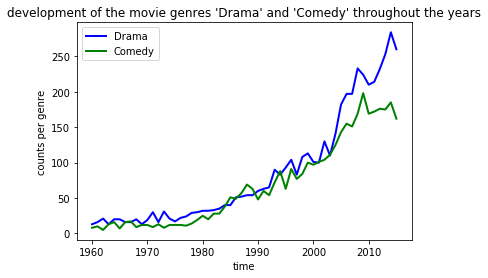

In [145]:
drama_df = count_df[count_df.genres == "Drama"]
comedy_df = count_df[count_df.genres == "Comedy"]

drama = plt.plot(unique_years, drama_df['counts'], linewidth=2.0, label = 'Drama', color = 'b')
comedy = plt.plot(unique_years, comedy_df['counts'], linewidth=2.0, label = 'Comedy', color = 'g')
plt.title("development of the movie genres 'Drama' and 'Comedy' throughout the years")
plt.ylabel('counts per genre')
plt.xlabel('time')
plt.legend();

The number of movies of both genres increased over time. Most of the years 'Drama' was (slightly) more produced than 'Comedy'. Between 2000 and 2010 the deviation between both genres became greater.

### Research Question 2: What kinds of properties are associated with movies that have high revenues?

To answer that question I will have to find the movies that have information on revenues first. 
To factor in inflation I take the revenue_adj column.

In [146]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000,10865.000,10865.000,10865.000,10865.000,10865.000,10865.000,10865.000,10865.000,10865.000
mean,66066.374,0.646,14624286.064,39826896.077,102.072,217.400,5.975,2001.322,17549894.037,51369001.759
std,92134.092,1.000,30914284.611,117008277.458,31.383,575.645,0.935,12.813,34307526.658,144638333.129
min,5.000,0.000,0.000,0.000,0.000,10.000,1.500,1960.000,0.000,0.000
25%,10596.000,0.208,0.000,0.000,90.000,17.000,5.400,1995.000,0.000,0.000
50%,20662.000,0.384,0.000,0.000,99.000,38.000,6.000,2006.000,0.000,0.000
75%,75612.000,0.714,15000000.000,24000000.000,111.000,146.000,6.600,2011.000,20853251.084,33701729.009
max,417859.000,32.986,425000000.000,2781505847.000,900.000,9767.000,9.200,2015.000,425000000.000,2827123750.412


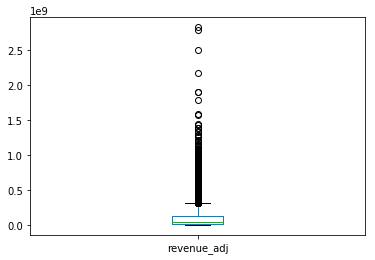

In [147]:
df_revenue = df.query('revenue_adj > 0')
df_revenue['revenue_adj'].plot(kind='box');

The above table shows that there is information on the revenues only for less than half of the movies. I put the information on the movies with revenues into a new dataframe df_revenue. If we look at it in a boxplot, there also seem to be a lot of outliers.

To get rid of them, I chose to drop all rows in which the value in the column 'revenue_adj' is more than one standard deviations away from the mean. 

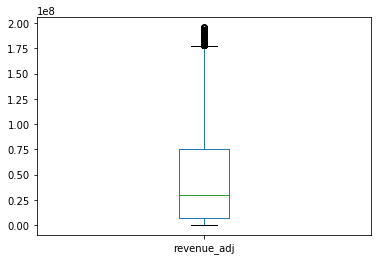

In [148]:
std_dev = df['revenue_adj'].mean() + df['revenue_adj'].std()
df_revenue = df.query('revenue_adj > 0 and revenue_adj < {}'.format(std_dev))
df_revenue['revenue_adj'].plot(kind='box');

Now the box plot gives a much clearer picture.

Next, I will look at the correlation between 'revenue_adj' and other parameters. 

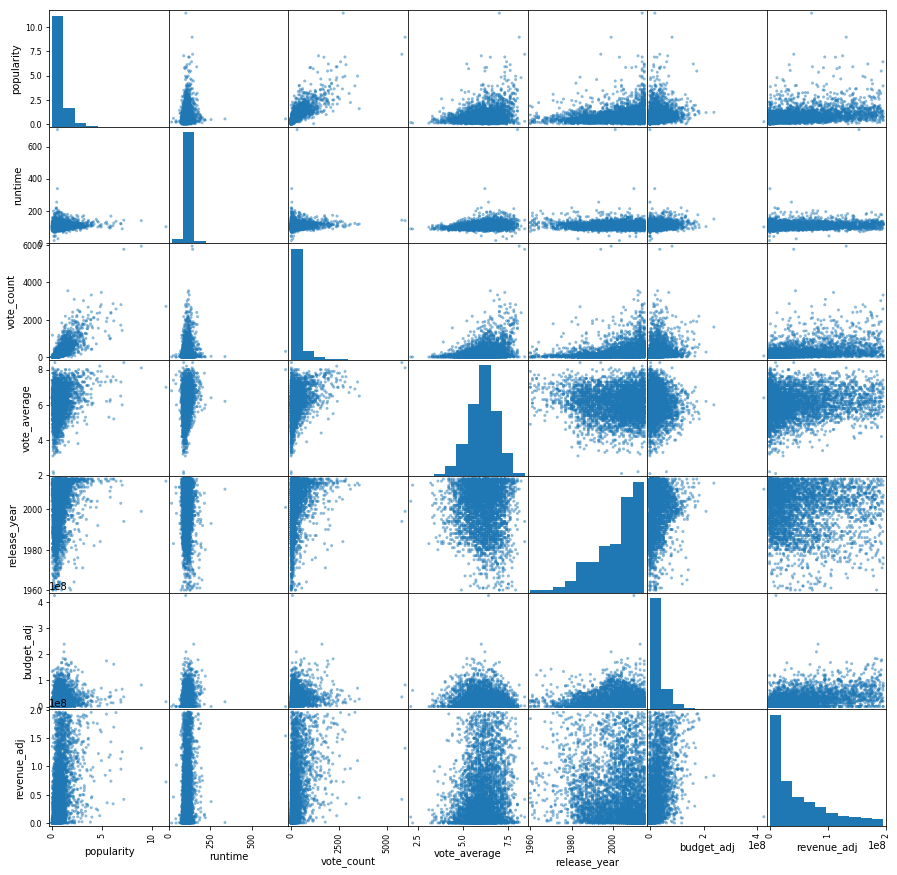

In [149]:
df_revenue_plot = df_revenue.drop(['id', 'budget', 'revenue'], axis = 1)
pd.plotting.scatter_matrix(df_revenue_plot, figsize = (15, 15));

The following table gives a short overview on the findings in the scatter matrix while concentrating on 'revenues_adj':

<table align=left>
    <tr>
        <th>column</th>
        <th>finding</th>        
    </tr>
    <tr>
        <td>popularity</td>
        <td>Movies with higher revenues are not automatically associated with higher popularity.</td>
    </tr>
    <tr>
        <td>runtime</td>
        <td>The runtime is stable and seems to be independet from the revenues.</td>
    </tr>
    <tr>
        <td>vote_count</td>
        <td>The number of votes on TNDb seems not to be influenced by higher revenues or the other way aorund.</td>
    </tr>
    <tr>
        <td>vote_average</td>
        <td>The average_vote and the revenues seem to have some correlation. It seems that movies with higher revenues have less low values for average_vote. 
        </td>
    </tr>
    <tr>
        <td>release_year</td>
        <td>There is no correlation between revenues and the year in which the movie was released.</td>
    </tr>
    <tr>
        <td>budget_adj</td>
        <td>The budget is stable and seems to be independet from the revenues.</td>
    </tr>
</table>

### Research Question 3: Which directors were most popular per year?

To answer this question one has to separate the content of the column 'director'. To do this I use the function I wrote earlier.

In [150]:
df_directors = splitting(df, 'director', '|')
df_directors.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.986,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500,2015,137999939.280,1392445892.524
1,76341,28.420,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.100,2015,137999939.280,348161292.489
2,262500,13.113,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.300,2015,101199955.472,271619025.408
3,140607,11.173,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.500,2015,183999919.040,1902723129.802
4,168259,9.335,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.300,2015,174799923.088,1385748801.471


Next, I will look which director was most popular per year.

In [151]:
unique_years_pop = df_directors.release_year.unique()
df_years_pop = pd.DataFrame(columns = df_directors.columns)

for year in unique_years_pop:
    df_year = df_directors[df_directors.release_year == year]
    pop_max = df_year['popularity'].max()
    max_row = df_year[df_year.popularity == pop_max]
    df_years_pop = df_years_pop.append(max_row, ignore_index=True)
    
df_years_pop = df_years_pop.iloc[:, 6:15]
df_years_pop.head()

,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500,2015
1,Christopher Nolan,saving the world|artificial intelligence|fathe...,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,11/5/14,6498,8.000,2014
2,George Lucas,android|galaxy|hermit|death star|lightsaber,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,4428,7.900,1977
3,James Cameron,culture clash|future|space war|space colony|so...,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.100,2009
4,Christopher Nolan,loss of lover|dream|sleep|subconsciousness|heist,148,Action|Thriller|Science Fiction|Mystery|Adventure,Legendary Pictures|Warner Bros.|Syncopy,7/14/10,9767,7.900,2010


In [152]:
df_years_pop_table = df_years_pop.copy()
df_years_pop_table.index = df_years_pop_table['release_year']
df_years_pop_table = df_years_pop_table.iloc[:, :1]
df_years_pop_table.sort_index(inplace=True)
df_years_pop_table

,director
release_year,
1960,Alfred Hitchcock
1961,Clyde Geronimi
1961,Hamilton Luske
1961,Wolfgang Reitherman
1962,Terence Young
1963,Terence Young
1964,Guy Hamilton
1965,Terence Young
1966,Ben Washam


In the above table one can see the director of the most popular movie per year.

To have a look who won this popularity contest most years, I count the single years per director. Afterwards I check who won the most years.

In [153]:
directors = df_years_pop.groupby('director').count().iloc[:, 7:8]
directors.release_year.max()

4

The best director was Wolfgang Reitherman who produced the most popular movie of the respective year for four times:

In [154]:
directors_top = directors[directors.release_year >= 3]
directors_top.columns = ['times won']
directors_top

,times won
director,
Christopher Nolan,3
James Cameron,3
Peter Jackson,3
Ridley Scott,3
Terence Young,3
Wolfgang Reitherman,4


### Research Question 4: Movies released in which season generate most revenues?

To get to the answer I first have to add a new column 'seaon' to the data frame. To fill this column I will split the month from the 'release_date' column and derive the corresponding season.

In [155]:
season_list = []
for month in df_revenue['release_date']:
    idx = df_revenue['id']
    mo = int(month.split('/')[0])
    if mo <=2 or mo ==12:
        season = 'winter'
    elif 3 <= mo <=5:
        season = 'spring'
    elif 6 <= mo <= 8:
        season = 'summer'
    else:
        season = 'autumn'
    #print(season_list)
    season_list.append(season)

#df_revenue['season'] = season_list
#above line of code threw a SettingWithCopyWarning, which told me to use .loc. But it still throws the warning.
df_revenue.loc[:,'season'] = pd.Series(season_list, index=df_revenue.index)
df_revenue.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,season
11,76757,6.189,176000003,183987723,Jupiter Ascending,Mila Kunis|Channing Tatum|Sean Bean|Eddie Redm...,Lana Wachowski|Lilly Wachowski,jupiter|space|woman director|3d|interspecies r...,124,Science Fiction|Fantasy|Action|Adventure,Village Roadshow Pictures|Dune Entertainment|A...,2/4/15,1937,5.200,2015,161919931.515,169268630.682,winter
12,264660,6.119,15000000,36869414,Ex Machina,Domhnall Gleeson|Alicia Vikander|Oscar Isaac|S...,Alex Garland,dancing|artificial intelligence|helicopter|dis...,108,Drama|Science Fiction,DNA Films|Universal Pictures International (UP...,1/21/15,2854,7.600,2015,13799993.928,33919845.955,winter
15,273248,5.898,44000000,155760117,The Hateful Eight,Samuel L. Jackson|Kurt Russell|Jennifer Jason ...,Quentin Tarantino,bounty hunter|wyoming|mountains|hangman|voice ...,167,Crime|Drama|Mystery|Western,Double Feature Films|The Weinstein Company|Fil...,12/25/15,2389,7.400,2015,40479982.189,143299244.588,winter
20,158852,5.462,190000000,209035668,Tomorrowland,Britt Robertson|George Clooney|Raffey Cassidy|...,Brad Bird,inventor|apocalypse|destiny|imax|dreamer,130,Action|Family|Science Fiction|Adventure|Mystery,Walt Disney Pictures|Babieka|A113,5/19/15,1899,6.200,2015,174799923.088,192312729.942,spring
21,307081,5.337,30000000,91709827,Southpaw,Jake Gyllenhaal|Rachel McAdams|Forest Whitaker...,Antoine Fuqua,sport,123,Action|Drama,Escape Artists|Riche-Ludwig Productions,6/15/15,1386,7.300,2015,27599987.856,84373003.716,summer


Now, I will calculate the mean for every season and visualize the outcome in a bar chart.

In [156]:
means = df_revenue.groupby('season')['revenue'].mean()
means

season
autumn   33643303.711
spring   36176227.078
summer   41553076.574
winter   41311550.076
Name: revenue, dtype: float64

Text(0, 0.5, 'average revnue')

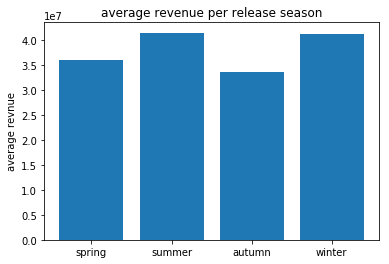

In [157]:
locations = [1, 2, 3, 4]
heights = [means[1], means[2], means[0], means[3]]
labels = ['spring', 'summer', 'autumn', 'winter']
plt.bar(locations, heights, tick_label = labels);
plt.title('average revenue per release season')
plt.ylabel('average revnue')

In the bar chart you can see that there are similar mean values for summer and winter as well as for spring and autumn.

### Research Question 5: Movies with which actors generated most revenues?

First, I will take the cleaned data frame and drop all rows without revenue information. This time I will keep the outliers.

In [158]:
df_actors_all = df.query('revenue_adj >0')

Now,  I will have to split the actors in the column cast and duplicate every row in the data frame for every actor. One could think about deviding the revenue of the movie by the number of names in its cast information. Since I don't assume that every actor in a movie influences the revenue by the same factor, I leave the revenues as they were. I just want to point out, that we cannot say that a spefic actor led to that amount of revenues. 

In [159]:
df_actors = splitting(df_actors_all, 'cast', '|')
df_actors.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.986,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500,2015,137999939.280,1392445892.524
1,135397,32.986,150000000,1513528810,Jurassic World,Bryce Dallas Howard,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500,2015,137999939.280,1392445892.524
2,135397,32.986,150000000,1513528810,Jurassic World,Irrfan Khan,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500,2015,137999939.280,1392445892.524
3,135397,32.986,150000000,1513528810,Jurassic World,Vincent D'Onofrio,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500,2015,137999939.280,1392445892.524
4,135397,32.986,150000000,1513528810,Jurassic World,Nick Robinson,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500,2015,137999939.280,1392445892.524


To prevent that actors, that are listed often, have automatically the highest revenues, I will not look at the sum of revenues but at the mean of revenues for every movie an actor took part in.

In [160]:
df_act_rev = df_actors.groupby('cast').mean()
df_act_rev = df_act_rev.iloc[:, 3:]
df_act_rev.head()

,revenue_adj
cast,
50 Cent,65959013.277
A Martinez,28345.898
A. Michael Baldwin,36020002.518
A.J. Cook,60406801.459
AJ Bowen,3545886.679


In [161]:
df_act_rev.sort_values(by='revenue_adj', ascending=False, inplace = True)
df_act_rev.head(10)

,revenue_adj
cast,
Daisy Ridley,1902723129.802
Robert MacNaughton,1791694309.249
Ken Howard,1583049536.352
Betty Lou Gerson,1574814739.705
Martha Wentworth,1574814739.705
Ben Wright,1574814739.705
J. Pat O'Malley,1574814739.705
Peter Cushing,1416327578.995
Bob Peck,1388863311.759


Movies with the above shown actors generated on average most revenues

### Research Question 6: What kinds of properties are associated with the most popular keyword(s) compared to the ones with lower popularity values?

For that I start finding out the most populat keywords. To do that I have to split the keywords in that column first and duplicate the row for every keyword.

For that I will use the function I wrote earlier. But since it seems to turn integers to strings, I will turn the interger values I want to use for the analysis into floats first.

In [165]:
df['runtime'] = df['runtime'].astype(float)
df['vote_count'] = df['vote_count'].astype(float)
df['release_year'] = df['release_year'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 17 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10865 non-null object
director                10865 non-null object
keywords                10865 non-null object
runtime                 10865 non-null float64
genres                  10865 non-null object
production_companies    10865 non-null object
release_date            10865 non-null object
vote_count              10865 non-null float64
vote_average            10865 non-null float64
release_year            10865 non-null float64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: float64(7), int64(3), object(7)
memory usage: 1.5+ MB


In [166]:
df_key = splitting(df, 'keywords', '|')
df_key.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.986,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster,124.000,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562.000,6.500,2015.000,137999939.280,1392445892.524
1,135397,32.986,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,dna,124.000,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562.000,6.500,2015.000,137999939.280,1392445892.524
2,135397,32.986,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,tyrannosaurus rex,124.000,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562.000,6.500,2015.000,137999939.280,1392445892.524
3,135397,32.986,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,velociraptor,124.000,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562.000,6.500,2015.000,137999939.280,1392445892.524
4,135397,32.986,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,island,124.000,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562.000,6.500,2015.000,137999939.280,1392445892.524


Now, I'm going to measure the mean popularity of every keyword value.

In [167]:
df_key.groupby('keywords').mean()
df_key.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.986,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster,124.000,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562.000,6.500,2015.000,137999939.280,1392445892.524
1,135397,32.986,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,dna,124.000,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562.000,6.500,2015.000,137999939.280,1392445892.524
2,135397,32.986,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,tyrannosaurus rex,124.000,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562.000,6.500,2015.000,137999939.280,1392445892.524
3,135397,32.986,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,velociraptor,124.000,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562.000,6.500,2015.000,137999939.280,1392445892.524
4,135397,32.986,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,island,124.000,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562.000,6.500,2015.000,137999939.280,1392445892.524


In [168]:
df_key.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,38939.000,38939.000,38939.000,38939.000,38939.000,38939.000,38939.000
mean,0.761,103.878,278.181,6.039,2000.264,21788103.906,66758152.145
std,1.139,28.398,662.700,0.903,12.946,37919640.353,165416916.116
min,0.000,0.000,10.000,1.500,1960.000,0.000,0.000
25%,0.246,91.000,20.000,5.500,1993.000,0.000,0.000
50%,0.451,100.000,55.000,6.100,2004.000,2172755.452,210766.387
75%,0.862,113.000,211.000,6.700,2010.000,28778289.658,58769839.144
max,32.986,900.000,9767.000,9.200,2015.000,425000000.000,2827123750.412


To compare the properties of the popular keywords with those of not populuar keywords I put the data into different data frames. To separate them I use the third quartile of df_key.

In [169]:
Q3 = df_key['popularity'].quantile(0.75)

df_key_pop_high = df_key.query('popularity > {}'.format(Q3))
df_key_pop_low = df_key.query('popularity <= {}'.format(Q3))

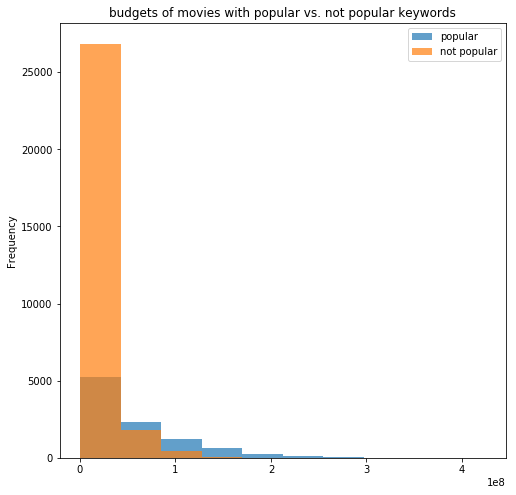

In [170]:
df_key_bud = pd.DataFrame({'popular': df_key_pop_high['budget_adj'], 
                           'not popular': df_key_pop_low['budget_adj']},
                           columns=['popular', 'not popular'])

df_key_bud.plot.hist(alpha=0.7, title = 'budgets of movies with popular vs. not popular keywords', figsize = (8,8));

As you can see the range of received budgets is bigger for movies with keywords with higher popularity.

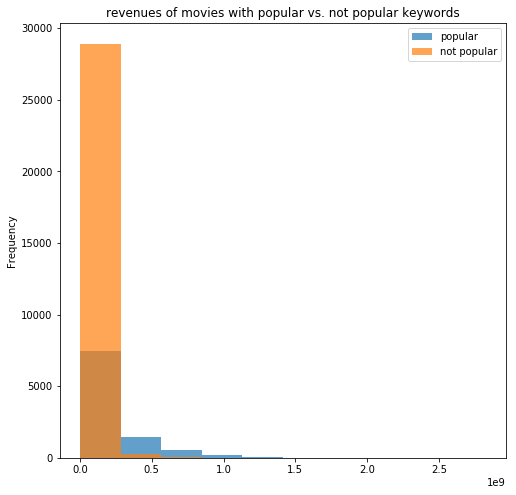

In [171]:
df_key_rev = pd.DataFrame({'popular': df_key_pop_high['revenue_adj'], 
                           'not popular': df_key_pop_low['revenue_adj']},
                           columns=['popular', 'not popular'])

df_key_rev.plot.hist(alpha=0.7, title = 'revenues of movies with popular vs. not popular keywords', figsize = (8,8));

What applies for the budget also apllies for the revenues. The range of revenues is greater for movies with keywords with higher popularity.

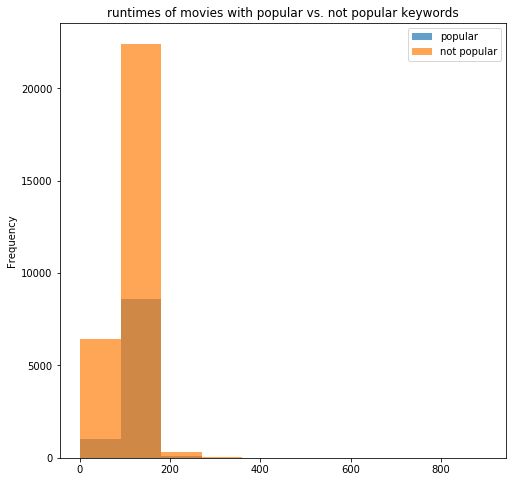

In [172]:
df_key_run = pd.DataFrame({'popular': df_key_pop_high['runtime'], 
                           'not popular': df_key_pop_low['runtime']},
                           columns=['popular', 'not popular'])

df_key_run.plot.hist(alpha=0.7, title = 'runtimes of movies with popular vs. not popular keywords', figsize = (8,8));

As you can see most movies have aruntime below ca. 180 minuntes. It seems that popular keywords and runtime are independent from each other. 

Also, the portion of movies with lower popularity values is higher for shorter movies (<= ca. 90 min).
And the portion of movies with higher popularity values is higher for movies between ca. 90 and 180 min.

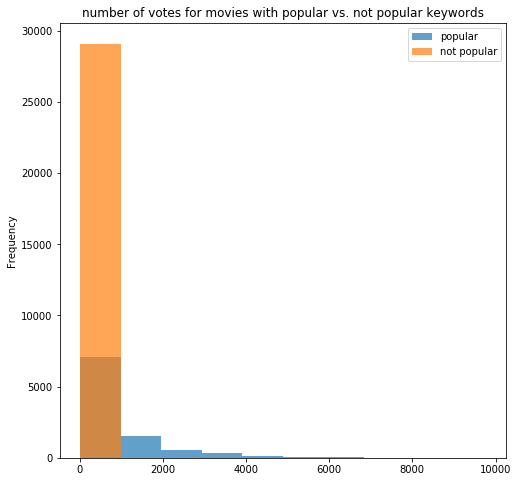

In [173]:
df_key_votc = pd.DataFrame({'popular': df_key_pop_high['vote_count'], 
                           'not popular': df_key_pop_low['vote_count']},
                           columns=['popular', 'not popular'])

df_key_votc.plot.hist(alpha=0.7, title = 'number of votes for movies with popular vs. not popular keywords', figsize = (8,8));

Most of the movies with not popular keywords received less than 1000 votes. The range for movies with popular keywords is greater.

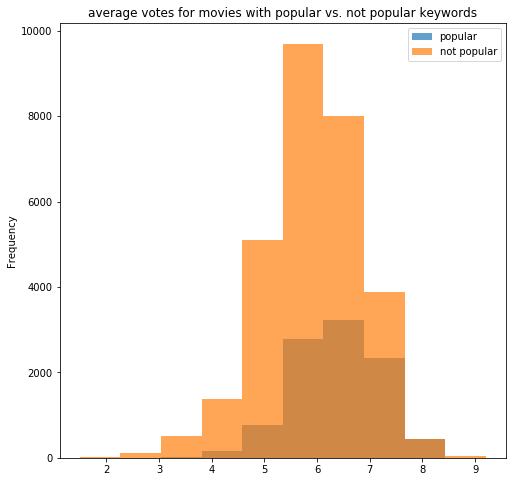

In [174]:
df_key_vota = pd.DataFrame({'popular': df_key_pop_high['vote_average'], 
                           'not popular': df_key_pop_low['vote_average']},
                           columns=['popular', 'not popular'])

df_key_vota.plot.hist(alpha=0.7, title = 'average votes for movies with popular vs. not popular keywords', figsize = (8,8));

The distribution of both kinds of movies is very similar for the average voting. It seems that the mode of movies with popular keywords is higher. 

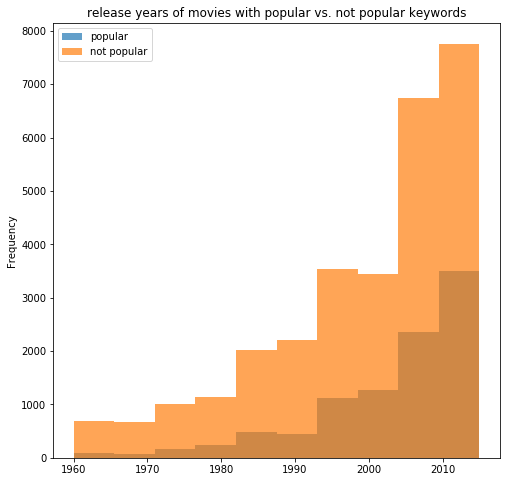

In [175]:
df_key_rel = pd.DataFrame({'popular': df_key_pop_high['release_year'], 
                           'not popular': df_key_pop_low['release_year']},
                           columns=['popular', 'not popular'])

df_key_rel.plot.hist(alpha=0.7, title = 'release years of movies with popular vs. not popular keywords', figsize = (8,8));

The distribution is very similar this time. This can only lead to the conclusion, that the popularity of movies linked to specific keywords is independed of the release date.

<a id='conclusions'></a>
## Conclusions

### Research Question 1: Which genres are most frequent from year to year?

I analysed which genre was most frequent in every year and found out the only relevant genres for answering that question  are 'Drama' and 'Comedy'. Below one can find the development of the frequencies of both genres.

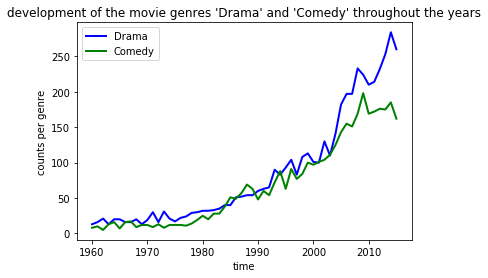

In [176]:
drama = plt.plot(unique_years, drama_df['counts'], linewidth=2.0, label = 'Drama', color = 'b')
comedy = plt.plot(unique_years, comedy_df['counts'], linewidth=2.0, label = 'Comedy', color = 'g')
plt.title("development of the movie genres 'Drama' and 'Comedy' throughout the years")
plt.ylabel('counts per genre')
plt.xlabel('time')
plt.legend();

### Research Question 2: What kinds of properties are associated with movies that have high revenues?

After looking at the properties associated with movies that have high revenues in a scatter matrix, I sum up my conclusions in the following table:

<table align=left>
    <tr>
        <th>column</th>
        <th>finding</th>        
    </tr>
    <tr>
        <td>popularity</td>
        <td>Movies with higher revenues are not automatically associated with higher popularity.</td>
    </tr>
    <tr>
        <td>runtime</td>
        <td>The runtime is stable and seems to be independet from the revenues.</td>
    </tr>
    <tr>
        <td>vote_count</td>
        <td>The number of votes on TNDb seems not to be influenced by higher revenues or the other way aorund.</td>
    </tr>
    <tr>
        <td>vote_average</td>
        <td>The average_vote and the revenues seem to have some correlation. It seems that movies with higher revenues have less low values for average_vote. 
        </td>
    </tr>
    <tr>
        <td>release_year</td>
        <td>There is no correlation between revenues and the year in which the movie was released.</td>
    </tr>
    <tr>
        <td>budget_adj</td>
        <td>The budget is stable and seems to be independet from the revenues.</td>
    </tr>
</table>

### Research Question 3: Which directors were most popular per year?

The best director was Wolfgang Reitherman who produced the most popular movie of the respective year for four times:

In [177]:
directors_top

,times won
director,
Christopher Nolan,3
James Cameron,3
Peter Jackson,3
Ridley Scott,3
Terence Young,3
Wolfgang Reitherman,4


### Research Question 4: Movies released in which season generate most revenues?

In the bar chart you can see that there are similar mean values for summer and winter as well as for spring and autumn.

Text(0, 0.5, 'average revnue')

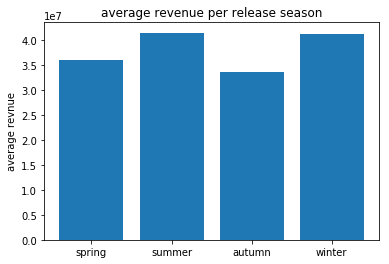

In [178]:
plt.bar(locations, heights, tick_label = labels);
plt.title('average revenue per release season')
plt.ylabel('average revnue')

### Research Question 5: Movies with which actors generated most revenues?

One could think about deviding the revenue of the movie by the number of names in its cast information. Since I don't assume that every actor in a movie influences the revenue by the same factor, I leave the revenues as they were. I just want to point out, that we cannot say that a spefic actor led to that amount of revenues.

Movies with the following actors generated on average most revenues:

In [179]:
df_act_rev.head(10)

,revenue_adj
cast,
Daisy Ridley,1902723129.802
Robert MacNaughton,1791694309.249
Ken Howard,1583049536.352
Betty Lou Gerson,1574814739.705
Martha Wentworth,1574814739.705
Ben Wright,1574814739.705
J. Pat O'Malley,1574814739.705
Peter Cushing,1416327578.995
Bob Peck,1388863311.759


### Research Question 6: What kinds of properties are associated with the most popular keyword(s) compared to the ones with lower popularity values?

Below one can find an overview on the output of my exploration in that regard:

<table align=left>
    <tr>
        <th>column</th>
        <th>finding</th>        
    </tr>
    <tr>
        <td>budget_adj</td>
        <td>As you can see the range of received budgets is bigger for movies with keywords with higher popularity.</td>
    </tr>
    <tr>
        <td>reveue_adj</td>
        <td>What applies for the budget also apllies for the revenues. The range of revenues is greater for movies with keywords with higher popularity.</td>
    </tr>
    <tr>
        <td>runtime</td>
        <td>As you can see most movies have aruntime below ca. 180 minuntes. It seems that popular keywords and runtime are independent from each other. 

Also, the portion of movies with lower popularity values is higher for shorter movies (<= ca. 90 min).
And the portion of movies with higher popularity values is higher for movies between ca. 90 and 180 min.</td>
    </tr>
    <tr>
        <td>vote_count</td>
        <td>Most of the movies with not popular keywords received less than 1000 votes. The range for movies with popular keywords is greater. 
        </td>
    </tr>
    <tr>
        <td>vote_average</td>
        <td>The distribution of both kinds of movies is very similar for the average voting. It seems that the mode of movies with popular keywords is higher.
</td>
    </tr>
    <tr>
        <td>release_year</td>
        <td>The distribution is very similar this time. This can only lead to the conclusion, that the popularity of movies linked to specific keywords is independed of the release date.</td>
    </tr>
</table>

These findings can also be read from the visualizations below.

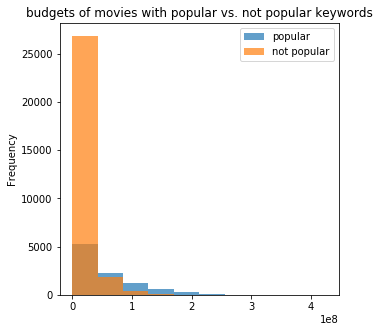

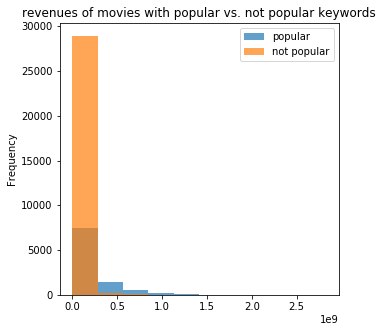

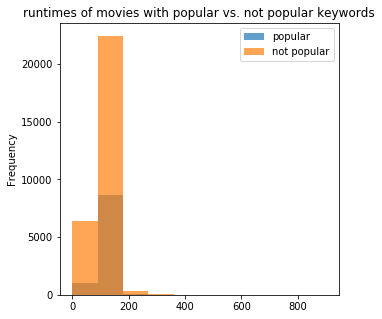

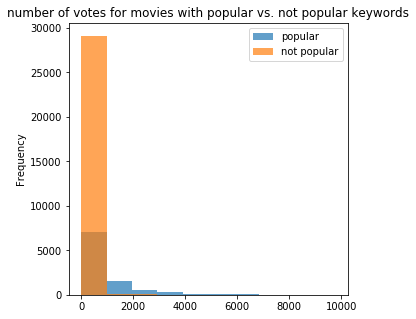

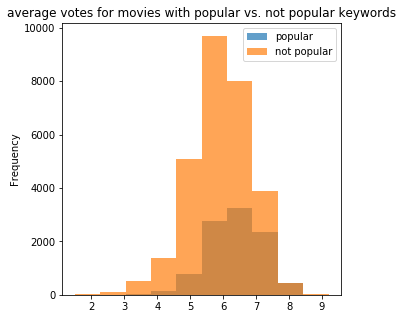

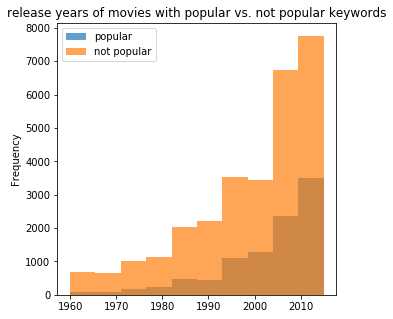

In [180]:
df_key_bud.plot.hist(alpha=0.7, title = 'budgets of movies with popular vs. not popular keywords', figsize = (5,5))
df_key_rev.plot.hist(alpha=0.7, title = 'revenues of movies with popular vs. not popular keywords', figsize = (5,5))
df_key_run.plot.hist(alpha=0.7, title = 'runtimes of movies with popular vs. not popular keywords', figsize = (5,5))
df_key_votc.plot.hist(alpha=0.7, title = 'number of votes for movies with popular vs. not popular keywords', figsize = (5,5))
df_key_vota.plot.hist(alpha=0.7, title = 'average votes for movies with popular vs. not popular keywords', figsize = (5,5))
df_key_rel.plot.hist(alpha=0.7, title = 'release years of movies with popular vs. not popular keywords', figsize = (5,5));